In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
np.arange(10).reshape(2, 5).sum(axis=-1)

array([10, 35])

$ Q \in \mathbb{R}^{q \times d_k}$ and $ K \in \mathbb{R}^{k \times d_k}$ and $ Q \in \mathbb{R}^{k \times d_v}$

In [71]:
softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

    
def attention(Q, K, V):
    d_k = Q.shape[-1]
    return softmax((Q @ K.T) / np.sqrt(d_k)) @ V

In [76]:
q = 10
d_k = 100
k = 50
d_v = 50

Q = np.random.normal(0, 1, size=(q, d_k))
K = np.random.normal(0, 1, size=(k, d_k))
V = np.random.normal(0, 1, size=(k, d_v))
out = attention(Q, K, V)
print(V)

Q@K.T [[-4.35866439e+00  3.74710679e+00 -1.14927578e+01 -6.63513552e+00
   5.82327501e+00 -5.02313080e+00  4.44138039e+00  1.83934907e+01
   2.13485531e+01 -3.23990780e+00 -5.51044527e+00  1.23307013e+01
   1.40072721e+01 -6.55817962e+00 -2.34189187e+00  2.56107651e+01
   1.32909851e+01 -3.27706431e+00 -9.18358257e+00 -7.30087610e+00
   7.16802557e+00 -8.87550297e+00  2.40605027e-01 -1.99622233e+01
   3.51469847e+00 -2.28444695e-01 -7.01059955e-01  5.26994082e+00
  -1.78942533e+01 -1.08100767e+01  2.36625236e-01 -6.47447495e+00
  -1.36548921e+01  9.76605326e+00  1.44897841e+01  8.37582073e+00
  -1.41167120e+01  4.90814178e-01  1.87076551e+01 -2.22026276e+01
   6.82481902e+00 -8.15272911e+00  8.08198272e+00 -3.32289015e+00
   1.05154580e+01  6.12896083e+00  1.51751834e+00  5.82385991e+00
  -9.03389269e+00  4.31779622e+00]
 [-4.28372215e+00 -6.40869303e+00 -1.14001827e+01  5.04058637e+00
  -4.90152384e+00  1.48573303e+01 -4.64788871e+00  5.68844631e+00
   4.52711812e+00  9.79251806e+00 -

Text(0.5, 1.0, 'Out')

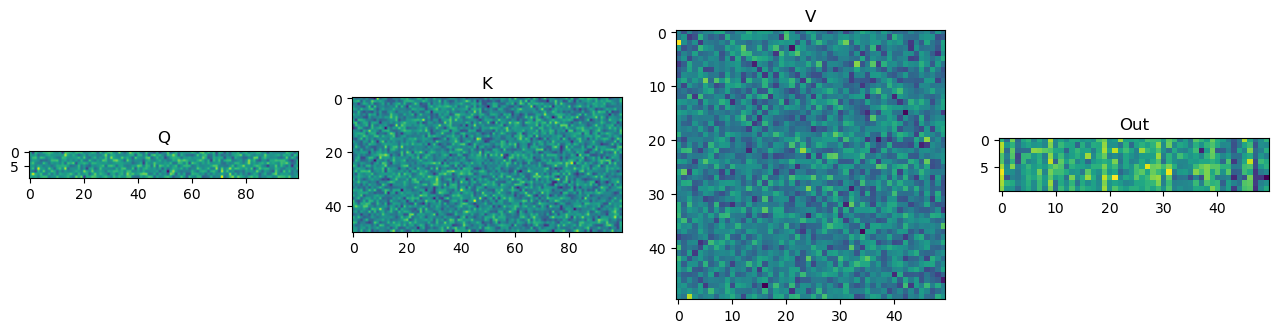

In [73]:
fig, axs = plt.subplots(1,4, figsize=(16,4))
axs[0].imshow(Q)
axs[0].set_title("Q")
axs[1].imshow(K)
axs[1].set_title("K")
axs[2].imshow(V)
axs[2].set_title("V")
axs[3].imshow(out)
axs[3].set_title("Out")

In [77]:
q = 2
d_k = 5
k = 5
d_v = 5

Q = np.ones((q, d_k))
Q[1] = 0
# Q[1,3] = 0
K = np.random.normal(0, 1, size=(k, d_k))
V = np.random.normal(0, 1, size=(k, d_v))
out = attention(Q, K, V)
print(V)


Q@K.T [[ 6.06103241  0.93808042  4.08184576  1.08454536 -1.52222351]
 [ 0.          0.          0.          0.          0.        ]]
softmax(Q@K.T) [[0.6040485  0.06110543 0.24926967 0.0652419  0.02033451]
 [0.2        0.2        0.2        0.2        0.2       ]]
[[-2.3219272   0.35793622  1.05454498  0.23854931  1.16960271]
 [-0.07732693 -0.32685923 -0.50160009 -0.99681708 -0.01389747]
 [-2.59370522  0.03647663  0.51526195  1.56884267 -0.59910692]
 [ 1.61469129 -0.50126123 -0.21122072 -0.38416569  0.74181172]
 [-0.2653956  -0.19048417 -0.14451821  0.05151847 -2.21919099]]


In [75]:
V.mean(axis=0)

array([-0.02209337, -0.45819042, -1.14462918,  0.28760275,  0.41856649])

In [61]:
out

array([[ 0.64873838,  1.1471235 ,  0.04928216,  0.38437949, -1.01927317],
       [ 0.70588429,  0.88456569,  0.02207947,  0.34248613, -0.57511109]])

Text(0.5, 1.0, 'Out')

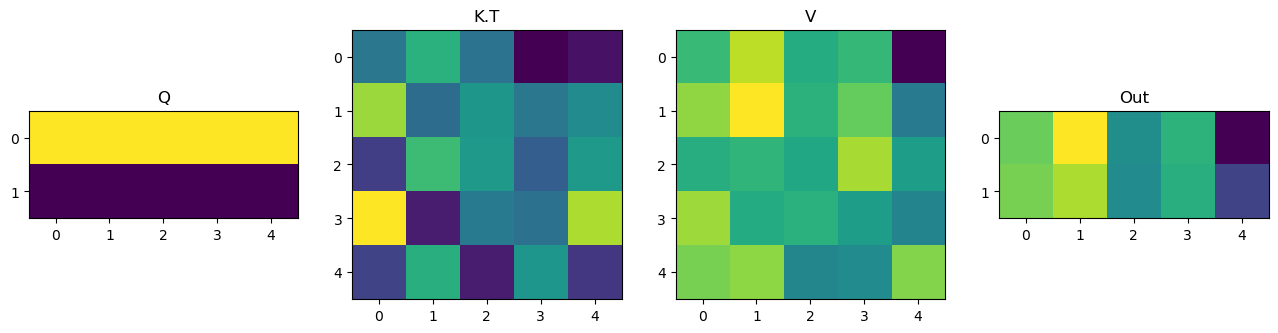

In [70]:
fig, axs = plt.subplots(1,4, figsize=(16,4))
axs[0].imshow(Q)
axs[0].set_title("Q")
axs[1].imshow(K.T)
axs[1].set_title("K.T")
axs[2].imshow(V)
axs[2].set_title("V")
axs[3].imshow(out)
axs[3].set_title("Out")

$ Q \in \mathbb{R}^{q \times d_{model}}$ and $ K \in \mathbb{R}^{k \times d_{model}}$ and $ Q \in \mathbb{R}^{k \times d_{model}}$

In [78]:
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:

class Attention:
    def __init__(self, d_k, d_v, d_model):
        self.d_k = d_k
        self.d_v = d_v
        self.d_model = d_model

        self.W_Q = np.random.normal(0, 1, size=(self.d_model, self.d_k))
        self.W_K = np.random.normal(0, 1, size=(self.d_model, self.d_k))
        self.W_V = np.random.normal(0, 1, size=(self.d_model, self.d_v))
        self.W_Q_grad = None
        self.W_K_grad = None
        self.W_V_grad = None
        


    def parameters(self):
        return [self.W_Q, self.W_K, self.W_V]

    def forward(self, Q, K, V):
        Q_project = Q @ self.W_Q
        K_project = K @ self.W_K
        V_project = V @ self.W_V
        return softmax((Q_project @ K_project.T) / np.sqrt(self.d_k)) @ V_project

    def backward(self):
        # We need the derivative
        # softmax(x) * (d_ij  - softmax(x))

        # Do derivative after each W
        




    def attention(self):
        pass